In [700]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [701]:
#引入数据文件
test=pd.read_csv(r"C:\Users\alex\Desktop\housing.data",header=None)
test = test.as_matrix()

D:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [702]:
#预处理，转换成array
dataset = [row[0].split() for row in test]
dataset = np.array(dataset,dtype=float)

In [703]:
#分割训练集和测试集
axis0,axis1 = dataset.shape
train_set = dataset[:int(0.7*axis0),:13]
print("train_set_shape:"+str(train_set.shape))
train_label = dataset[:int(0.7*axis0),13].reshape(354,1)
print("train_label_shape:"+str(train_label.shape))
test_set= dataset[int(0.7*axis0):,:13]
print("testset_shape:"+str(test_set.shape))
test_label = dataset[int(0.7*axis0):,13].reshape(-1,1)
print("test_label_shape:"+str(test_label.shape))

train_set_shape:(354, 13)
train_label_shape:(354, 1)
testset_shape:(152, 13)
test_label_shape:(152, 1)


In [704]:
#进行均值归一化
def standardization(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset-mu)/sigma

In [705]:
train_set = standardization(train_set)
test_set = standardization(test_set)

In [706]:
#构建多元线性回归模型的输入参数
tmp = np.ones((train_set.shape[0],1))
train_set = np.c_[tmp,train_set]
print(train_set.shape)
tmp = np.ones((test_set.shape[0],1))
test_set = np.c_[tmp,test_set]

(354, 14)


In [707]:
#计算代价函数
def costfunction(x,y,theta):
    predict_y = np.dot(x,theta)
    J = (1/(2*x.shape[0]))*np.sum(np.square(predict_y-y))
    return predict_y,J

In [708]:
#初始化参数theta
theta = np.random.rand(test_set.shape[1],1)

In [709]:
predict_y,J = costfunction(test_set,test_label,theta)
print(J)

168.33629386111855


In [710]:
#单步梯度下降
def gradient_decent(x,y,theta,learning_rate):
    predict_y = np.dot(x,theta)
    theta = theta-learning_rate*np.dot(x.T,(predict_y-y))*(1/x.shape[0])
    return theta

In [711]:
def accuracy(predict_y,y):
    return np.sum(1-np.abs(predict_y-y)/y)/(y.shape[0])

In [712]:
#进行梯度下降
train_losses = []
test_losses = []
accuracies_train = []
accuracies_test  = []
for i in range(2500):
    train_predict_y,J_train = costfunction(train_set,train_label,theta)
    test_predict_y,J_test =  costfunction(test_set,test_label,theta)
    accuracy_trian = accuracy(train_predict_y,train_label)
    accuracy_test =  accuracy(test_predict_y,test_label)
    theta = gradient_decent(train_set,train_label,theta,0.0003)
    train_losses.append(J_train)
    test_losses.append(J_test)
    accuracies_train.append(accuracy_trian)
    accuracies_test.append(accuracy_test)
    
    if(i%1000==0):
        print("after"+str(i)+"training the train_set losses are "+str(J_train))
        print("\n")
        print("after"+str(i)+"trainging the train_set accuracy are "+str(accuracy_trian))
        print("\n")
        print("after"+str(i)+"training the test_set losses are "+str(J_test))
        print("\n")
        print("after"+str(i)+"trainging the test_set accuracy are "+str(accuracy_test))
        
        

after0training the train_set losses are 339.4065152765559


after0trainging the train_set accuracy are 0.022189956600826333


after0training the test_set losses are 168.33629386111855


after0trainging the test_set accuracy are 0.04559632897971913
after1000training the train_set losses are 179.89080214200646


after1000trainging the train_set accuracy are 0.2536174685156859


after1000training the test_set losses are 75.45144770269228


after1000trainging the test_set accuracy are 0.4429780272176136
after2000training the train_set losses are 99.92302182564516


after2000trainging the train_set accuracy are 0.44209709616093584


after2000training the test_set losses are 40.27726295970043


after2000trainging the test_set accuracy are 0.6722226511655601


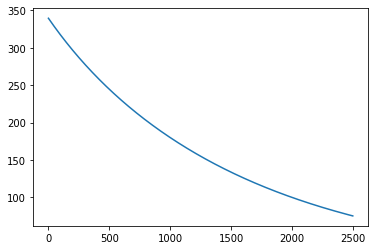

In [713]:
plt.plot(train_losses)

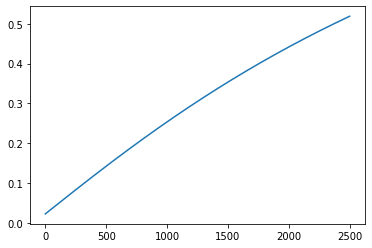

In [714]:
plt.plot(accuracies_train)

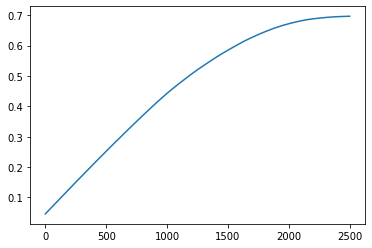

In [715]:
plt.plot(accuracies_test)

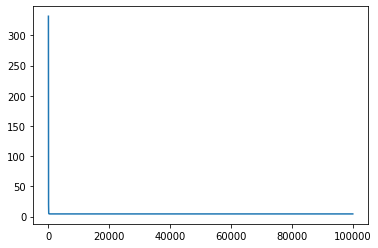

In [716]:
plt.plot(train_lossess)

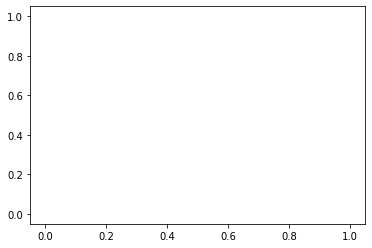

In [717]:
plt.plot(test_lossess)